# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [1]:
import pandas as pd

In [2]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


In [3]:
sample_df20 = sample_df.loc[sample_df["column 1"] < 30]
sample_df20.head()

,column 1,column 2
0,20,0
2,15,1
6,10,1


In [4]:
df_ex = pd.read_csv("oh_table.csv")

In [5]:
len(df_ex)

10606

You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Follow along with the live coding activity to see how this works.

In [6]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
zeros = sample_df["column 1"].loc[sample_df["column 2"] == 0]
zeros

0    20
4    65
5    50
Name: column 1, dtype: int64

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [7]:
ones = sample_df["column 1"].loc[sample_df["column 2"] == 1]
ones

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [8]:
fiftys = sample_df["column 2"].loc[sample_df["column 1"] == 50]
fiftys

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [9]:
# You will need to import numpy
import numpy as np

In [10]:
df = df_ex.loc[df_ex["group_id"] == 0]
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [11]:
# You can use this function in your code to find the log of distance:
# np.log10()
ab_mag = df["G"] - 5 * np.log10(df["distance"]) + 5
df["Absolute Magnitude"] = ab_mag
ab_mag.head()

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    5.591135
1    3.453987
2    4.402686
3    3.648780
4    5.914335
dtype: float64

In [12]:
ab_mag_all = df_ex["G"] - 5 * np.log10(df_ex["distance"]) + 5
df_ex["Absolute Magnitude"] = ab_mag_all
ab_mag_all.head()

0    5.591135
1    3.453987
2    4.402686
3    3.648780
4    5.914335
dtype: float64

In [13]:
df_ex.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,Absolute Magnitude
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151,5.591135
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151,3.453987
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151,4.402686
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151,3.648780
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151,5.914335


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [14]:
import matplotlib.pyplot as plt

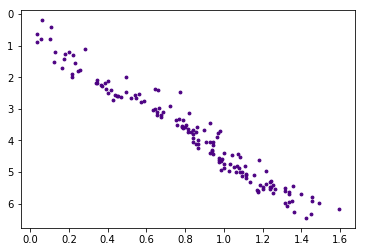

In [15]:
color = df["G"] - df["J"]
plt.scatter(color, ab_mag, s = 8, c = "indigo")
plt.gca().invert_yaxis()
plt.show()

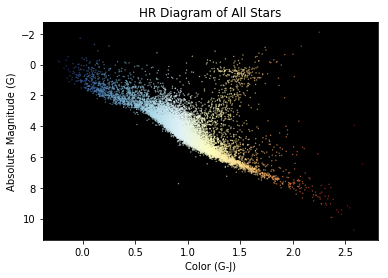

In [39]:
color_ex = df_ex["G"] - df_ex["J"]
cm = plt.cm.get_cmap("RdYlBu_r")
plt.scatter(color_ex, ab_mag_all, c=color_ex, s = 0.1, cmap=cm)
plt.gca().invert_yaxis()
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.title("HR Diagram of All Stars")
plt.ylabel("Absolute Magnitude (G)")
plt.xlabel("Color (G-J)")
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

In [17]:
sunJ = 3.64
sunG = 5.12
sun_color = sunG - sunJ

In [25]:
#plt.scatter(color, ab_mag, s = 8, c = "orange")
#plt.scatter(sun_color, sunG, s = 100, c = "red")
#plt.gca().invert_yaxis()
#plt.show()

### Coding Challenge 2: Add a colormap to your diagram

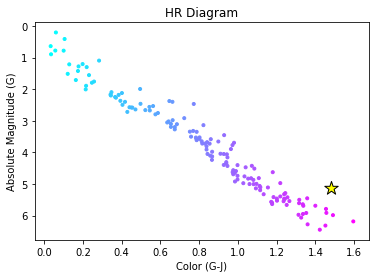

In [41]:
cm = plt.cm.get_cmap("cool")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(color, ab_mag, c=color, s=9, cmap=cm) # This plots all our points as a scatterplot
plt.scatter(sun_color, sunG, s = 200, c = "yellow", edgecolor = "black", marker = "*")
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('HR Diagram')
plt.gca().invert_yaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.show()

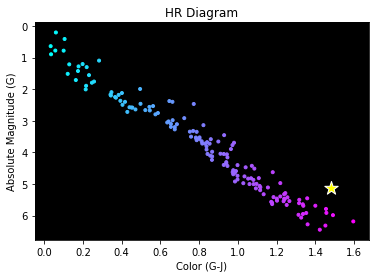

In [46]:
cm = plt.cm.get_cmap("cool")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(color, ab_mag, c=color, s=9, cmap=cm) # This plots all our points as a scatterplot
plt.scatter(sun_color, sunG, s = 200, c = "yellow", edgecolor = "white", marker = "*")
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('HR Diagram')
plt.gca().invert_yaxis() # This inverts the x axis so that the hottest stars are on the left.
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.show()

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

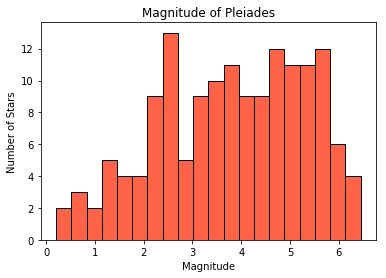

In [24]:
plt.hist(ab_mag, 20, color = "tomato", edgecolor = "black")
plt.title("Magnitude of Pleiades")
plt.xlabel("Magnitude")
plt.ylabel("Number of Stars")
plt.show()

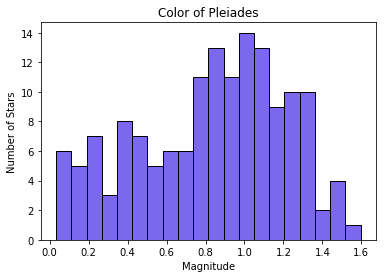

In [22]:
plt.hist(color, 20, color = "mediumslateblue", edgecolor = "black")
plt.title("Color of Pleiades")
plt.xlabel("Magnitude")
plt.ylabel("Number of Stars")
plt.show()

In [23]:
ab_mag.mean()

3.8037982368149996